<h1><center>Axion-photon coupling constraints</center></h1>

In this problem sheet we will be using what we learned in Chapters 14 and 15 to calculatethe some of the most important constraints on the axion-photon coupling.

In [1]:
# Plotting parameters
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('font', size=18)

## 1) Calculating QCD reference values

We will start by calculating the standard estimate for expected range of the QCD's coupling to the photon. As seen in lecture 16, this is given by

\begin{equation}
g_{a \gamma} \equiv \frac{\alpha}{2 \pi} \frac{C_{a\gamma}}{f_{a}}=2.0 \times 10^{-16} C_{a \gamma} \frac{m_{a}}{\mu \mathrm{eV}} \mathrm{GeV}^{-1}
\end{equation}

with a dependent constant:
\begin{equation}
C_{a\gamma} \equiv \frac{E}{N} - 1.92(4) = 
\begin{cases}
  0.75, & {\rm KSVZ} \\
  -1.25, & {\rm DFSZ\,I} \\
  -1.92, & {\rm DFSZ\,II}
\end{cases}
\end{equation}

**1.1** Write a function to calculate $g_{a\gamma}$ as a function of $m_a$ and $C_{a\gamma}$

**1.2** Hence plot the axion-photon coupling as a function of mass for KSVZ and DFSZ II.

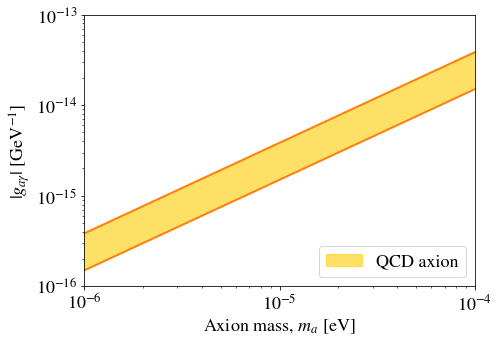

In [2]:
import numpy as np

# Calculate predicted QCD axion region
def g_QCD(m_a, C=1):
    return 2e-16*C*(m_a/1e-6)
    
m_a = np.logspace(-10, 0, 100)

plt.figure(figsize = (7, 5))

# plot predicted region
plt.loglog(m_a, abs(g_QCD(m_a, 0.75)), color = "tab:orange", lw = 2)
plt.loglog(m_a, abs(g_QCD(m_a, -1.92)), color = "tab:orange", lw = 2)
plt.fill_between(m_a, abs(g_QCD(m_a, 0.75)), abs(g_QCD(m_a, -1.92)),
                 color = "#ffcc00", alpha = 0.6, label = "QCD axion")

plt.ylabel("$|g_{a\gamma}|$ [GeV$^{-1}$]")
plt.xlabel("Axion mass, $m_a$ [eV]")

plt.legend(loc = 4)

plt.xlim(1e-6, 1e-4);
plt.ylim(1e-16, 1e-13);

## 2) ADMX

We will now extend what we did in problem set 6 to calculate the expected constraints from a three different campaigns by ADMX. 

Recall that the power of such a cavity is given by

\begin{equation}
    P_{a} = C\frac{g_{a\gamma}^2B^2V\rho_{\mathrm{DM}}}{m_a}Q
\end{equation}

where $B$ is the magnetic field through the cavity, $V$, $Q$ and C are it's volume, quality factor and form factor respectively and $\rho_{\mathrm{DM}}$ is the local density of dark matter which ADMX take to be 0.45 GeV cm$^{-3}$.

The signal to noise ratio is then given by the Dicke radiometer equation which, for a noise power given by $P_{\mathrm{noise}} = T_{\mathrm{sys}}\Delta\nu$, is given by

\begin{equation}
    \mathrm{SNR} = \frac{P}{T_{\mathrm{sys}}}\sqrt{\frac{t}{\Delta \nu}}
\end{equation}

where $T_{\mathrm{sys}}$ is the system temperature.


**2.1** Write a function to calculate the power of the cavity in watts as a function of axion mass and the various cavity parameters

**2.2** Use this to write an additional function for calculating the signal-to-noise ratio as a function of the same inputs plus the bandwidth and system temperature.

*Hint 1: As always, be careful with the units. You can use the fact that $1$eV$^2 = 1.44 \times 10^{-3}$T.*
    
*Hint 2: See <a href="http://ilan.schnell-web.net/physics/natural.pdf">here</a> for other useful conversions.*

In [3]:
import numpy as np

import matplotlib.pyplot as plt

hbar = 4.1e-24 # GeV s
e = 1.6e-19 # c
c = 3e8 # m/s
kB = 1.38e-23

def cavity_power(g_GeV, B, vol, rho, quality, m_eV, form_factor = 1):
    '''
    Returns cavity power in watts.
    
    inputs:
        - g: axion photon coupling (GeV)
        - B: magnetic field (T)
        - vol: volume (cm)
        - rho: DM density (GeV cm^(-3))
        - quality: quality factor (unitless)
        - m: axion mass (eV)
    '''
    
    m_GeV = m_eV*1e-9
    B_GeV = B/(1.4e-3)*(1e-9)**2
    
    P_GeV =  g_GeV**2*B_GeV**2*vol*rho*quality/m_GeV
    
    return P_GeV*1e9*e/hbar


def SNR(P, Tsys, del_t, bandwidth):
    return (P/(Tsys*kB))*(del_t/bandwidth)**(1/2)

We will consider three different ADMX campaigns

#### ADMX 2009 
- $m_a \in \{1.93, 3.64\} \mu$eV
- $V = 136$ liters
- $B = 6.8 $ T
- $Q \sim 30000$
- $\Delta \nu = 30 $ Hz
- $T_{\mathrm{sys}} = 30$ K
- $C \sim 0.69$
- 80 seconds at each frequency
- arXiv: https://arxiv.org/pdf/0910.5914.pdf

#### ADMX 2018 
- $m_a \in \{2.66, 2.81\} \mu$eV
- $V = 136$ liters
- $B = 6.8 $ T
- $Q \sim 50000$
- $\Delta \nu = 25 $ Hz
- $T_{\mathrm{sys}} = 350$ mK
- $C \sim 0.4$
- 100 seconds at each frequency
- arXiv: https://arxiv.org/pdf/1804.05750.pdf

#### ADMX 2019
- $m_a \in \{2.81, 3.31\} \mu$eV
- $V = 136$ liters
- $B = 7.6 $ T
- $Q \sim 50000$
- $\Delta \nu = 25 $ Hz
- $T_{\mathrm{sys}} = 350$ mK
- $C \sim 0.4$
- 100 seconds at each frequency
- arXiv: https://arxiv.org/pdf/1910.08638.pdf

Given that none of these experiments detected the axion, we can put a constraint on the axion-photon coupling by finding $g_{a\gamma}$ such that SNR=3.

**2.3** Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html">scipy.optimize.root</a> or otherwise to find $g_{a\gamma}$ such that SNR=3 as a function of axion mass for each of the experiments outlined above.

**2.4** Plot these constraints along with the QCD reference value calculated above.

In [4]:
from scipy.optimize import root

def constrain(g_GeV, m_eV, target_snr, exp_perams):
    B, vol, rho, quality, T_sys, bandwith, scan_time, form_factor = exp_perams
    P = cavity_power(g_GeV, B, vol, rho, quality, m_eV, form_factor)
    snr = SNR(P, T_sys, scan_time, bandwidth)
    return target_snr - snr

# ADMX 2009 - https://arxiv.org/pdf/0910.5914.pdf

Q = 3e4 # (Assuming to be the same at 2018)
T_sys = 2 # K
B_field = 7.6 # T
dm_density = 0.45 # GeV / cm^3
vol = 136*1000 # cm^3
bandwidth = 30e3 # Hz
scan_time = 80 # seconds
form_factor = 0.69

exp_perams = [B_field, vol, dm_density, Q, T_sys, bandwidth, scan_time, form_factor]

masses_admx2009 = np.linspace(1.93e-6, 3.64e-6, 100)
g_ADMX2009 = [root(constrain, 1e-15, args = (m_a, 3, exp_perams)).x[0] for m_a in masses_admx2009]

In [5]:
# ADMX 2018 - https://arxiv.org/pdf/1804.05750.pdf

Q = 5e4
T_sys = 300e-3 # K
B_field = 6.9 # T
dm_density = 0.45 # GeV / cm^3
vol = 136*1000
bandwidth = 25e3
scan_time = 100 # seconds
form_factor = 0.4

exp_perams = [B_field, vol, dm_density, Q, T_sys, bandwidth, scan_time, form_factor]

masses_admx2018 = np.linspace(2.66e-6,2.81e-6, 100)
g_ADMX2018 = [root(constrain, 1e-15, args = (m_a, 3, exp_perams)).x[0] for m_a in masses_admx2018]

In [6]:
# ADMX 2019 - https://arxiv.org/pdf/1910.08638.pdf

Q = 3e4
T_sys = 350e-3 # K
B_field = 7.6 # T
dm_density = 0.45 # GeV / cm^3
vol = 136*1000
bandwidth = 25e3 # Assume this is the same as 2018
scan_time = 100 # seconds
form_factor = 0.4

exp_perams = [B_field, vol, dm_density, Q, T_sys, bandwidth, scan_time, form_factor]

masses_admx2019 = np.linspace(2.81e-6,3.31e-6, 100)
g_ADMX2019 = [root(constrain, 1e-15, args = (m_a, 3, exp_perams)).x[0] for m_a in masses_admx2019]


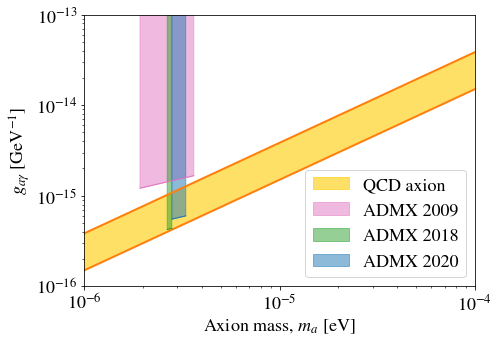

In [7]:
# Calculate predicted QCD axion region
m_a = np.logspace(-10, 0, 100)
g_QCD_KSFZ = 2e-16*0.75*(m_a/1e-6)
g_QCD_DSVZ = 2e-16*1.92*(m_a/1e-6)

plt.figure(figsize = (7, 5))

# plot predicted region
plt.loglog(m_a, g_QCD_KSFZ, color = "tab:orange", lw = 2)
plt.loglog(m_a, g_QCD_DSVZ, color = "tab:orange", lw = 2)
plt.fill_between(m_a, g_QCD_DSVZ, g_QCD_KSFZ, color = "#ffcc00", alpha = 0.6, label = "QCD axion")

# Plot ADMX 2009
plt.loglog(masses_admx2009, g_ADMX2009, lw = 1, color = "tab:pink")
plt.fill_between(masses_admx2009, g_ADMX2009, np.ones(len(g_ADMX2009)), color = "tab:pink", alpha = 0.5, label = "ADMX 2009")

# Plot ADMX 2019
plt.loglog(masses_admx2018, g_ADMX2018, lw = 1, color = "tab:green")
plt.fill_between(masses_admx2018, g_ADMX2018, np.ones(len(g_ADMX2018)), color = "tab:green", alpha = 0.5, label = "ADMX 2018")

# Plot ADMX 2019
plt.loglog(masses_admx2019, g_ADMX2019, lw = 1, color = "tab:blue")
plt.fill_between(masses_admx2019, g_ADMX2019, np.ones(len(g_ADMX2019)), color = "tab:blue", alpha = 0.5, label = "ADMX 2020")

plt.ylabel("$g_{a\gamma}$ [GeV$^{-1}$]")
plt.xlabel("Axion mass, $m_a$ [eV]")

plt.legend(loc = 4)

plt.xlim(1e-6, 1e-4);
plt.ylim(1e-16, 1e-13);

## 3) Horizontal Branch Stars

As discussed in Chapter 15.3, axions coupled to photons would significantly reduce the lifetime of stars in the horizontal branch (HB) stars. However they would produce negligible changes on the evolution of red giant branch (RGB) stars. As such, the axion-photon coupling can be constrained by measurements of "the R parameter" which is the ratio of HB stars to RGB stars:
\begin{equation}
    R = N_{\mathrm{HB}}/N_{\mathrm{RGB}}.
\end{equation}

The impact of this coupling has to be calculated numerically, however these results are well described by the relation

\begin{equation}
    R_{pred} = 6.26Y - 0.41g_{10}^2-0.12
\end{equation}

where $Y$ is the Helium abundance, $g_{10} ≡ g_{aγ}/10^{−10}$ GeV$^{−1}$.

The Helium abundance and R-parameter are measured to be $Y_{\mathrm{obs}}=0.2535±0.0036$ and $R_{\mathrm{obs}} = 1.39±0.04$ respectively, where the errors shown are the $68\%$ confidence limits. See [Ayala et. al](https://arxiv.org/pdf/1406.6053.pdf) for more information.

**3.1** Write a fuction to calculate $R$ as a function of $g_{a\gamma}$ and $Y$.

**3.2** Hence create a <a href ="https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.contourf.html">contourf plot</a> (or similar) showing $R$ over some range of $g_{a\gamma}$ and $Y$.

**3.3** Add lines which indicate where the R parameter is equal to the observed value as well as the $68\%$ upper and lower limits.

**3.4** Add three more lines showing the observed value of $Y$ along with the upper and lower limits.

**3.5** For the QCD axion, we can calculate the axion-photon coupling as a function of the axion mass. Therefore, this upper limit on $g_{a\gamma}$ relates to an upper limit on the axion mass. What is this upper limit for $C_{a\gamma} = \mathcal{O}(1)$?

*Hint: An example of how to plot specific contour values is shown in the both solution sheets for the second lab.*

g_ap from HB = (4.3 / + 1.3 - 1.9)*1e-11


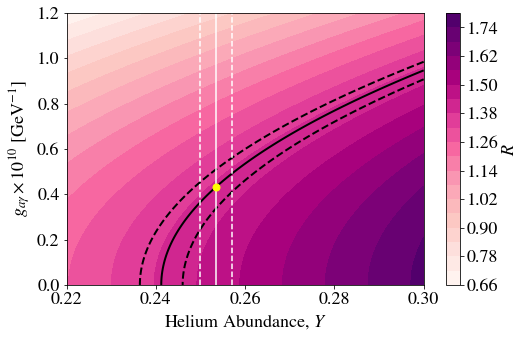

In [8]:
alpha_em = 1/137
Y = 0.2515

def R_param(Y, gap):
    g_10 = gap/1e-10
    return 6.26*Y - 0.41*g_10**2 - 0.12

y = np.linspace(0.22, 0.3, 100)
gap = np.linspace(0, 1.2e-10, 100)

Y, Gap = np.meshgrid(y, gap)

R = R_param(Y, Gap)

plt.figure(figsize = (8,5))
CS = plt.contourf(y, gap*1e10, R, 20, cmap = "RdPu")
cbar = plt.colorbar()
cbar.set_label('$R$')
plt.contour(CS, levels=[1.42], colors='k', linewidths = 2, linestyles = '--')
plt.contour(CS, levels=[1.39], colors='k', linewidths = 2, linestyles = '-')
plt.contour(CS, levels=[1.36], colors='k', linewidths = 2, linestyles = '--')

plt.plot([0.2535, 0.2535], [0, 1.2], color = "white", linestyle = '-')
plt.plot([0.2571, 0.2571], [0, 1.2], color = "white", linestyle = '--')
plt.plot([0.2499, 0.2499], [0, 1.2], color = "white", linestyle = '--')

plt.ylabel("$g_{a\gamma} \\times 10^{10}$ [GeV$^{-1}$]");
plt.xlabel("Helium Abundance, $Y$");

# Find "hint" value of g_ap

def find_g(gap, R, Y):
    return R_param(Y, gap) - R

g_HB = root(find_g, 1e-10, args=(1.39, 0.2535)).x[0]
g_HB_lower = root(find_g, 1e-10, args=(1.42, 0.2499)).x[0]
g_HB_upper = root(find_g, 1e-10, args=(1.36, 0.2571)).x[0]

plt.plot(0.2535, g_HB*1e10, "o", color = "#ffff00", ms = 7)
#plt.plot(0.2571, g_HB_upper*1e10, "o", color = "#ffff00", ms = 7)
#plt.plot(0.2499, g_HB_lower*1e10, "o", color = "#ffff00", ms = 7)

print("g_ap from HB = ({:.2} / + {:.2} - {:.2})*1e-11".format(g_HB*1e11, 
                                (g_HB_upper-g_HB)*1e11, (g_HB-g_HB_lower)*1e11))


We find that the preferred value of $g_{a\gamma}$ from horizontal branch stars is  

\begin{equation}
    g_{a\gamma, \mathrm{HB}} = 4.3 ^{+1.3}_{-1.9} \times 10^{-11} \mathrm{GeV}.
\end{equation}

For $C_{a\gamma} = \mathcal{O}(1)$ this relates to an axion mass of $m_a = 0.2$ eV.

## 4) CAST
<center><a href = "https://arxiv.org/pdf/1705.02290.pdf"></a></center>

We saw in Yoni Kahn's lecture on modern directions in axion detection that there is a mixing between the axion and the photon. For a homogenious magnetic field $B$, in the absence of a plasma frequency, the probablility of conversion from an axion to photon (or visa-versa) is given by

\begin{equation}
    P_{a\gamma} = \left(g_{a\gamma}B \frac{\sin(qL/2)}{q} \right)^2
\end{equation}

where $q = \frac{m_a^2}{2E}$ is the axion-photon momentum transfer in a vacuum in which we expect $E\sim \mathrm{O}(\mathrm{keV})$.

We also saw in lecture 17 that we expect axions to be produced in the sun via this same mixing with photons.

In the CAST experiment a 9T magnetic field over a distance of 9.26m in an attempt to convert these solar axions into X-ray photons in their two "conversion pipes", each with a cross sectional area of 14.5 cm$^2$. See [the CAST paper](https://arxiv.org/pdf/1705.02290.pdf) for more information.
 
**4.1** Write a function to calculate the probability of axion-photon conversion as a function the mass, coupling strength, magnetic field strength and axion energy.

**4.2** Hence calulate and plot this probability as a function of axion mass for coupling strengths of $10^{-9}$, $10^{-11}$ and $10^{-12}$ GeV$^{-1}$.

**4.3** You should see that the probability begins to decreases at masses around 0.01 eV. Why does this happen?

*Hint: As always, be careful with units. For low axion masses, you should expect probabilities of $\sim 10^{-17} - 10^{-13}$.*

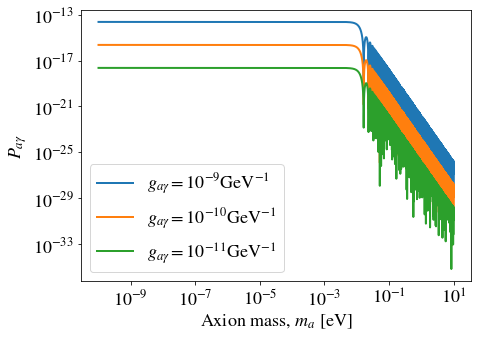

In [9]:
hbar_GeV = 6.58e-25 # s.GeV
c = 3e8 # m/s
m2GeV = 1/(c*hbar_GeV)

def conv_prob(gap, m_a, B, L, E):
    q = m_a**2/(2*E)*1e-9 # Momentum transfer (GeV)
    B_GeV = B/(1.4e-3)*(1e-9)**2 # Magnetic field (GeV^{2})
    L_GeV = L*m2GeV
    
    #print("{:.2}, {:.2}, {:.2}, {:.2}, {:.2}".format(m_a, q, L_GeV, q*L_GeV, np.sin(q*L_GeV/2)))
    return (gap*B_GeV*np.sin(q*L_GeV/2)/q)**2

E = 1e3 # axion energy (eV)
L = 9.26 # m
B = 9 # T

masses = np.logspace(-10, 1, 10000)

gap_list = [1e-9, 1e-10, 1e-11]
labels = ["$g_{a\gamma}=10^{-9} \mathrm{GeV}^{-1}$", "$g_{a\gamma}=10^{-10} \mathrm{GeV}^{-1}$", 
          "$g_{a\gamma}=10^{-11} \mathrm{GeV}^{-1}$"]
plt.figure(figsize = (7,5))
for i, gap in enumerate(gap_list):
    prob = np.asarray([conv_prob(gap, m_a, B, L, E) for m_a in masses])
    plt.loglog(masses, prob, label = labels[i], lw = 2)
plt.ylabel("$P_{a\gamma}$")
plt.xlabel("Axion mass, $m_a$ [eV]")
plt.legend()

Like ADMX, the CAST collaboration has not yet detected a signal from solar axions allowing us to place constraints on the axion parameter space.

**4.6** Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html">scipy.optimize.root</a> one last time to calculte $g_{a\gamma}$ such that the number of expected photons detected is 3. 

**4.7** Hence plot this constraint on $g_{a\gamma}$ as a function of axion mass.

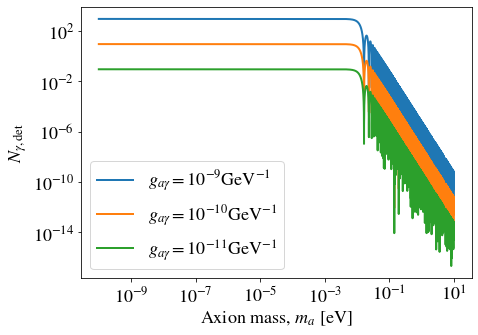

In [10]:
def expected_photons(gap, m_a, det_time, B, L, E):
    '''
    Detected energy in keV
    '''
    N_axions =  1e10*det_time
    #print(N_axions)
    prob = conv_prob(gap, m_a, B, L, E)
    N_photons = prob*N_axions
    return N_photons

time = 1132*60**2 # seconds

gap_list = [1e-9, 1e-10, 1e-11]
labels = ["$g_{a\gamma}=10^{-9} \mathrm{GeV}^{-1}$", "$g_{a\gamma}=10^{-10} \mathrm{GeV}^{-1}$", 
          "$g_{a\gamma}=10^{-11} \mathrm{GeV}^{-1}$"]
plt.figure(figsize = (7,5))
for i, gap in enumerate(gap_list):
    n_photons = np.asarray([expected_photons(gap, m_a, time, 9, 9.2, 1e3) for m_a in masses])
    plt.loglog(masses, n_photons, label = labels[i], lw = 2)
plt.ylabel("$N_{\gamma, \mathrm{det}}$")
plt.xlabel("Axion mass, $m_a$ [eV]")
plt.legend()

Much like ADMX, the CAST collaboration has not yet detected a signal from solar axions allowing us to place constraints on the axion parameter space.

### Tasks

- Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html">scipy.optimize.root</a> one last time to calculte $g_{a\gamma}$ such that the number of expected photons detected is 3. 

- Hence plot this constraint on $g_{a\gamma}$ as a function of axion mass.

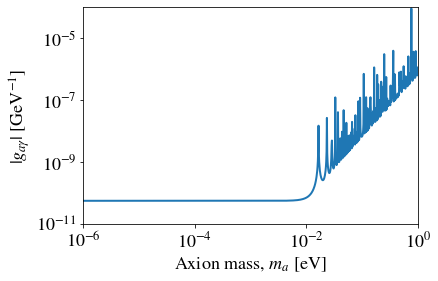

In [11]:
def cast_constraint(gap, m_a, B, L, E, det_time):
    N = expected_photons(gap, m_a, det_time, B, L, E)
    return N - 3

time = 1132*60**2 # seconds
masses_cast = np.logspace(-6, 0, 1000)
g_cast = np.asarray([root(cast_constraint, 1e-10, args = (m_a, 9, 9.2, 1e3, time)).x[0] for m_a in masses_cast])

plt.loglog(masses_cast, g_cast, lw = 2)

plt.ylabel("$|g_{a\gamma}|$ [GeV$^{-1}$]")
plt.xlabel("Axion mass, $m_a$ [eV]")

plt.xlim(1e-6, 1e-0);
plt.ylim(1e-11, 1e-4);

### 5) Pulling it all together

**5.1** Collect together all of your constraints into one final plot over some appropriate mass range.

*Hint: You can use <a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.fill_between.html"> matplotlib.pyplot.fill_between</a> to show where the regions is disallowed by each calculation.*

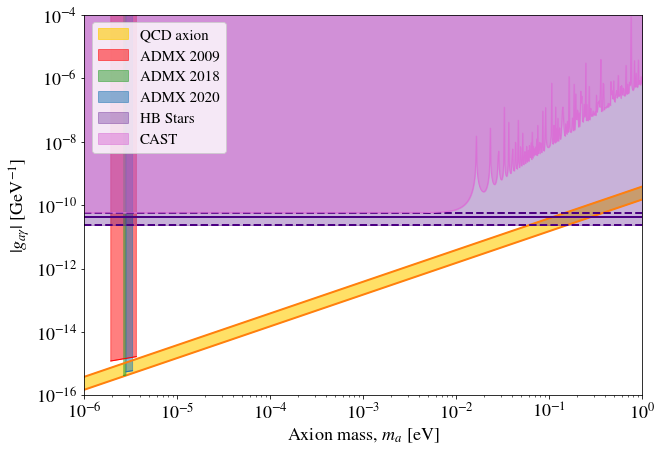

In [13]:
# Calculate predicted QCD axion region
m_a = np.logspace(-10, 0, 100)
g_QCD_KSFZ = 2e-16*0.75*(m_a/1e-6)
g_QCD_DSVZ = 2e-16*1.92*(m_a/1e-6)

plt.figure(figsize = (10, 7))

# plot predicted region
plt.loglog(m_a, g_QCD_KSFZ, color = "tab:orange", lw = 2)
plt.loglog(m_a, g_QCD_DSVZ, color = "tab:orange", lw = 2)
plt.fill_between(m_a, g_QCD_DSVZ, g_QCD_KSFZ, color = "#ffcc00", alpha = 0.6, label = "QCD axion")

# Plot ADMX 2009
plt.loglog(masses_admx2009, g_ADMX2009, lw = 1, color = "red")
plt.fill_between(masses_admx2009, g_ADMX2009, np.ones(len(g_ADMX2009)), color = "red", alpha = 0.5, label = "ADMX 2009")

# Plot ADMX 2019
plt.loglog(masses_admx2018, g_ADMX2018, lw = 1, color = "tab:green")
plt.fill_between(masses_admx2018, g_ADMX2018, np.ones(len(g_ADMX2018)), color = "tab:green", alpha = 0.5, label = "ADMX 2018")

# Plot ADMX 2019
plt.loglog(masses_admx2019, g_ADMX2019, lw = 1, color = "tab:blue")
plt.fill_between(masses_admx2019, g_ADMX2019, np.ones(len(g_ADMX2019)), color = "tab:blue", alpha = 0.5, label = "ADMX 2020")

# Horizontal branch stars
plt.loglog([1e-6, 1], [g_HB, g_HB], lw = 2, color = "indigo")
plt.loglog([1e-6, 1], [g_HB_lower, g_HB_lower],"--",  lw = 2, color = "indigo")
plt.loglog([1e-6, 1], [g_HB_upper, g_HB_upper],"--", lw = 2, color = "indigo")
plt.fill_between([1e-6, 1], [1, 1], [g_HB_lower, g_HB_lower], 
                 color = "indigo", alpha = 0.3, label = "HB Stars")

# Plot CAST 2017
plt.loglog(masses_cast, g_cast, lw = 1, color = "orchid")
plt.fill_between(masses_cast, g_cast, np.ones(len(g_cast)), color = "orchid", alpha = 0.5, label = "CAST")



plt.ylabel("$|g_{a\gamma}|$ [GeV$^{-1}$]")
plt.xlabel("Axion mass, $m_a$ [eV]")

plt.legend(loc = 2, prop={'size': 15})

plt.xlim(1e-6, 1e-0);
plt.ylim(1e-16, 1e-4);